In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Exploratory analysis

I will perform exploratory data analysis with commentary along the way. I will import the data and perform some quick checks on what the data looks like.

In [505]:
data = pd.read_csv("C:/Users/dgall/Downloads/assessment_data.tsv", sep="\t")
final=data.copy()
data.head()

,event_id,listing_date,event_listing_date_id,taxonomy,event_title,event_datetime,tickets_listed,mean_listing_price,performer_1,performer_2,performer_3,performer_4,venue_name
0,3594065,2017-06-01,3594065_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-09-07T02:10:00Z,8942.0,56.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium
1,3594068,2017-06-01,3594068_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-09-06T02:10:00Z,11642.0,32.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium
2,3594070,2017-06-01,3594070_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-09-05T00:10:00Z,10344.0,49.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium
3,3594118,2017-06-01,3594118_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-07-06T02:10:00Z,13130.0,32.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium
4,3594116,2017-06-01,3594116_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-07-07T02:10:00Z,13102.0,48.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium


In [387]:
data.tail()

,event_id,listing_date,event_listing_date_id,taxonomy,event_title,event_datetime,tickets_listed,mean_listing_price,performer_1,performer_2,performer_3,performer_4,venue_name
8975,3594048,2017-08-31,3594048_17409,MLB Baseball,San Diego Padres at Los Angeles Dodgers,2017-09-26T02:10:00Z,NaN,NaN,Los Angeles Dodgers,San Diego Padres,NaN,NaN,Dodger Stadium
8976,3594045,2017-08-31,3594045_17409,MLB Baseball,San Diego Padres at Los Angeles Dodgers,2017-09-28T02:08:00Z,NaN,NaN,Los Angeles Dodgers,San Diego Padres,NaN,NaN,Dodger Stadium
8977,3594053,2017-08-31,3594053_17409,MLB Baseball,San Francisco Giants at Los Angeles Dodgers,2017-09-24T01:10:00Z,NaN,NaN,Los Angeles Dodgers,San Francisco Giants,NaN,NaN,Dodger Stadium
8978,3594055,2017-08-31,3594055_17409,MLB Baseball,San Francisco Giants at Los Angeles Dodgers,2017-09-23T02:10:00Z,NaN,NaN,Los Angeles Dodgers,San Francisco Giants,NaN,NaN,Dodger Stadium
8979,3594050,2017-08-31,3594050_17409,MLB Baseball,San Francisco Giants at Los Angeles Dodgers,2017-09-24T20:10:00Z,NaN,NaN,Los Angeles Dodgers,San Francisco Giants,NaN,NaN,Dodger Stadium


In [388]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8980 entries, 0 to 8979
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   event_id               8980 non-null   int64  
 1   listing_date           8980 non-null   object 
 2   event_listing_date_id  8980 non-null   object 
 3   taxonomy               8839 non-null   object 
 4   event_title            8980 non-null   object 
 5   event_datetime         8980 non-null   object 
 6   tickets_listed         6334 non-null   float64
 7   mean_listing_price     6334 non-null   float64
 8   performer_1            8980 non-null   object 
 9   performer_2            5668 non-null   object 
 10  performer_3            201 non-null    object 
 11  performer_4            11 non-null     object 
 12  venue_name             8980 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 912.2+ KB


,event_id,tickets_listed,mean_listing_price
count,8.980000e+03,6334.000000,6334.000000
mean,3.704733e+06,3228.568993,229.209391
std,1.078200e+05,4507.847862,259.703997
min,3.209664e+06,3.000000,10.000000
25%,3.594076e+06,33.000000,37.000000
50%,3.750580e+06,56.000000,51.000000
75%,3.799878e+06,8675.750000,498.555000
max,3.982984e+06,13594.000000,857.430000


The data is ordered by the listing date. The null values seem to be concentrated at the end of the time frame where I have to make the forecasts for tickets listed and mean listing price. Additionally, performer three and performer four have many nulls. I assume this is associated to performers for the concert hall. Finally there are a few nulls in taxonomy. 

There is a very large gap between the mean and median in both tickets listed and mean listing price. This will be investigated below.

First, I convert the dates to datetime objects for easier manipulation.

In [389]:
data['listing_date']=pd.to_datetime(data['listing_date'])
data['event_datetime']=pd.to_datetime(data['event_datetime'])

In [390]:
print(f"First listing is {data['listing_date'].min()}")
print(f"First event is {data['event_datetime'].min()}")
print(f"Final listing is {data['listing_date'].max()}")

print(f"Final event is {data['event_datetime'].max()}")

First listing is 2017-06-01 00:00:00
First event is 2017-06-02 02:05:00+00:00
Final listing is 2017-08-31 00:00:00
Final event is 2018-06-03 21:00:00+00:00


The first listing date is 2017-06-01 not 2017-05-20 as indicated in the pdf. Considering this was already a small data set for the given problem, losing ten days isn't great. However, I don't think it will change the method I choose or greatly effect performance because, again, it was a small training set to begin with.

There is a year long gap between first and final event. Predictive power for that final event will likely depend on if there is ticketing information for events a similar time period in the future. One of the most important pieces of information will likely be the length of time between the event date and the listing date. I suspect the actual listing date does not matter greatly, however there is likely to be a difference between a listing two months before an event and two days before an event. But we shall continue with the analysis before adding this feature.

In [391]:
data['venue_name'].unique()

array(['Dodger Stadium', 'Chickasaw Bricktown Ballpark',
       'Walt Disney Concert Hall'], dtype=object)

<Axes: xlabel='venue_name', ylabel='count'>

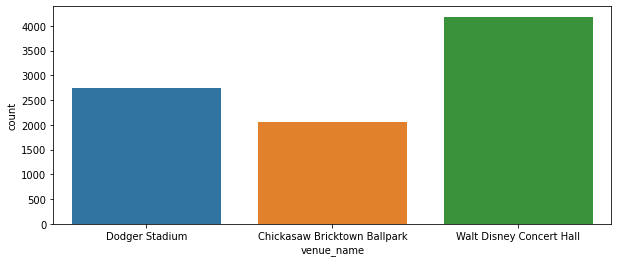

In [392]:
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='venue_name')

This is counting the number of listing dates associated to each venue. Almost double the number of listings for walt over Chickasaw.

In [393]:
data.nunique()

event_id                  164
listing_date               89
event_listing_date_id    8980
taxonomy                    3
event_title                74
event_datetime            167
tickets_listed           1891
mean_listing_price       1179
performer_1                11
performer_2                29
performer_3                 5
performer_4                 2
venue_name                  3
dtype: int64

This makes me think the taxonomy is in one-to-one with venue name. I can likely drop taxonomy and not lose any data for the nulls associated to toxonomy. 

There aren't an enormous number of events which means each event has many listings of tickets. On average there are over fifty listings per event. This definitely has a full range because we know the earliest event is June 2 and can have at most two listings.

Due to the number of ticket listings and listing prices it might be worth it to bin these to optimize the model. However there is almost surely a strong relationship between ticket listings and mean listing price so this binning cannot be done carelessly. 

In [394]:
data.groupby('event_id').mean('mean_listing_price')

,tickets_listed,mean_listing_price
event_id,,
3209664,28.692308,820.282308
3209665,48.750000,803.750000
3209666,20.333333,429.666667
3209668,16.000000,839.000000
3555599,34.000000,842.000000
...,...,...
3931481,6.571429,365.525000
3945007,NaN,NaN
3972484,NaN,NaN


The above chart is showing the average of all listing prices per event. I am taking the average of mean_listing_price for each event. Let's investigate one of these high listing price events.

In [395]:
data.loc[data['event_id']==3931481].head()

,event_id,listing_date,event_listing_date_id,taxonomy,event_title,event_datetime,tickets_listed,mean_listing_price,performer_1,performer_2,performer_3,performer_4,venue_name
5024,3931481,2017-07-17,3931481_17364,Classical Orchestral,Israel Philharmonic Orchestra: Philharmonic - ...,2017-10-31 03:00:00+00:00,4.0,366.50,Los Angeles Philharmonic,Israel Philharmonic Orchestra,NaN,NaN,Walt Disney Concert Hall
5124,3931481,2017-07-18,3931481_17365,Classical Orchestral,Israel Philharmonic Orchestra: Philharmonic - ...,2017-10-31 03:00:00+00:00,4.0,377.25,Los Angeles Philharmonic,Israel Philharmonic Orchestra,NaN,NaN,Walt Disney Concert Hall
5223,3931481,2017-07-19,3931481_17366,Classical Orchestral,Israel Philharmonic Orchestra: Philharmonic - ...,2017-10-31 03:00:00+00:00,7.0,373.86,Los Angeles Philharmonic,Israel Philharmonic Orchestra,NaN,NaN,Walt Disney Concert Hall
5321,3931481,2017-07-20,3931481_17367,Classical Orchestral,Israel Philharmonic Orchestra: Philharmonic - ...,2017-10-31 03:00:00+00:00,7.0,348.00,Los Angeles Philharmonic,Israel Philharmonic Orchestra,NaN,NaN,Walt Disney Concert Hall
5417,3931481,2017-07-21,3931481_17368,Classical Orchestral,Israel Philharmonic Orchestra: Philharmonic - ...,2017-10-31 03:00:00+00:00,7.0,348.00,Los Angeles Philharmonic,Israel Philharmonic Orchestra,NaN,NaN,Walt Disney Concert Hall


The high listing price is a Walt Disney event, but the initial listings have mean price much lower than the average. I am going to plot the tickets listed and price against the listing date.

<Axes: xlabel='listing_date', ylabel='tickets_listed'>

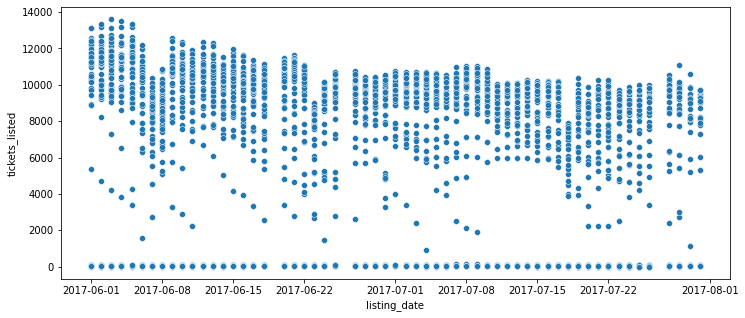

In [396]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=data, x='listing_date', y='tickets_listed')

There appear to be two clusters, tickets listed between 6000 and 12000 with some wiggle room, and a cluster most likely less than 100. It is fair to guess that the tickets listed in the thousands are associated to the mlb. If this is true, then the minor league and walt is all along zero. It will likely be important to separate the data set by venue and analyze.

<Axes: xlabel='listing_date', ylabel='mean_listing_price'>

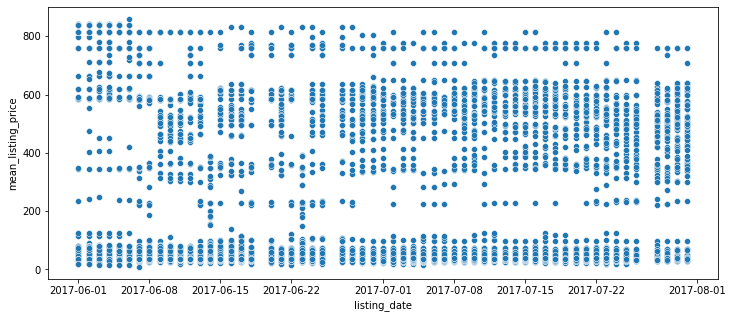

In [397]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=data, x='listing_date', y='mean_listing_price')

In [398]:
data['days_to_event'] = data['event_datetime'].dt.dayofyear - data['listing_date'].dt.dayofyear

#there will be some negatives here so we add 365 to the negatives.
data['days_to_event']=data['days_to_event'].apply(lambda x: x+365 if x < 0 else x)

<Axes: xlabel='days_to_event', ylabel='mean_listing_price'>

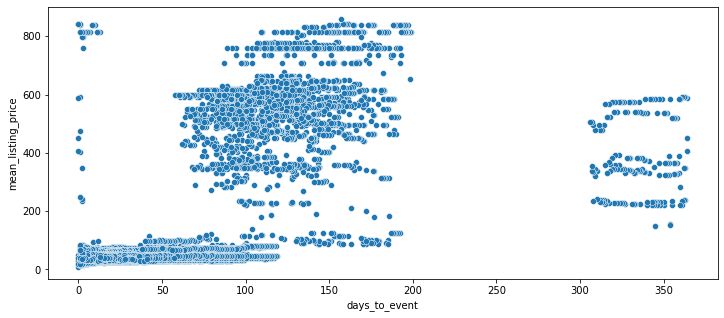

In [399]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=data, x='days_to_event', y='mean_listing_price')

No obvious trend, but I would say two clusters when not disregarding time.

<Axes: xlabel='days_to_event', ylabel='tickets_listed'>

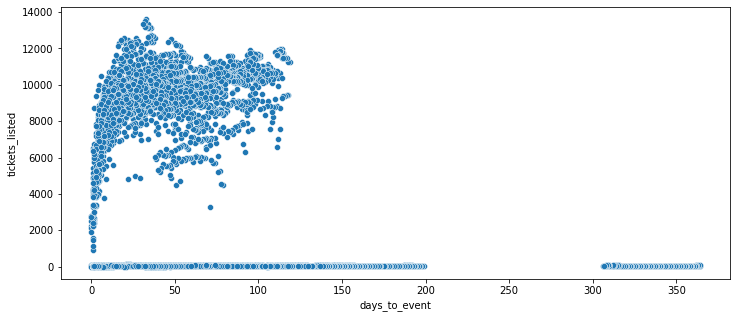

In [400]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=data, x='days_to_event', y='tickets_listed')

Here is an obviously interesting trend.

Not as obvious a clustering as the tickets listed. However a rough cluster between 400-800 and one under 150 seems accurate. Again this may be differentiated when analyzing dataset by venue. Let's do this below.

## Analysis by venue

In [401]:
df_dodger_st = data.loc[data['venue_name']=='Dodger Stadium'].copy()
df_dodger_st

,event_id,listing_date,event_listing_date_id,taxonomy,event_title,event_datetime,tickets_listed,mean_listing_price,performer_1,performer_2,performer_3,performer_4,venue_name,days_to_event
0,3594065,2017-06-01,3594065_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-09-07 02:10:00+00:00,8942.0,56.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium,98
1,3594068,2017-06-01,3594068_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-09-06 02:10:00+00:00,11642.0,32.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium,97
2,3594070,2017-06-01,3594070_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-09-05 00:10:00+00:00,10344.0,49.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium,96
3,3594118,2017-06-01,3594118_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-07-06 02:10:00+00:00,13130.0,32.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium,35
4,3594116,2017-06-01,3594116_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,2017-07-07 02:10:00+00:00,13102.0,48.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8975,3594048,2017-08-31,3594048_17409,MLB Baseball,San Diego Padres at Los Angeles Dodgers,2017-09-26 02:10:00+00:00,NaN,NaN,Los Angeles Dodgers,San Diego Padres,NaN,NaN,Dodger Stadium,26
8976,3594045,2017-08-31,3594045_17409,MLB Baseball,San Diego Padres at Los Angeles Dodgers,2017-09-28 02:08:00+00:00,NaN,NaN,Los Angeles Dodgers,San Diego Padres,NaN,NaN,Dodger Stadium,28
8977,3594053,2017-08-31,3594053_17409,MLB Baseball,San Francisco Giants at Los Angeles Dodgers,2017-09-24 01:10:00+00:00,NaN,NaN,Los Angeles Dodgers,San Francisco Giants,NaN,NaN,Dodger Stadium,24
8978,3594055,2017-08-31,3594055_17409,MLB Baseball,San Francisco Giants at Los Angeles Dodgers,2017-09-23 02:10:00+00:00,NaN,NaN,Los Angeles Dodgers,San Francisco Giants,NaN,NaN,Dodger Stadium,23


In [402]:
df_dodger_st.columns

Index(['event_id', 'listing_date', 'event_listing_date_id', 'taxonomy',
       'event_title', 'event_datetime', 'tickets_listed', 'mean_listing_price',
       'performer_1', 'performer_2', 'performer_3', 'performer_4',
       'venue_name', 'days_to_event'],
      dtype='object')

<Axes: xlabel='listing_date', ylabel='tickets_listed'>

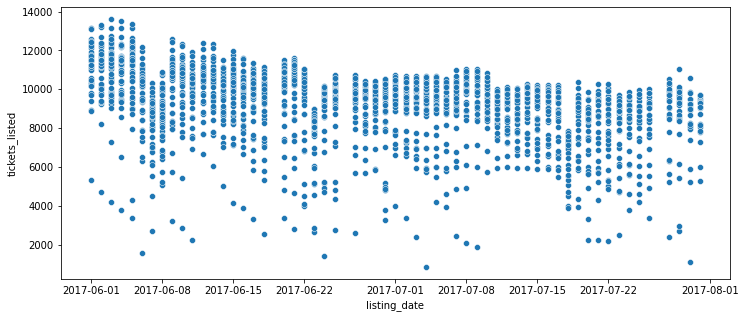

In [403]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_dodger_st, x='listing_date', y='tickets_listed')

As suspected, the cluster between 4000 and 12000 was from the mlb.

<Axes: xlabel='event_datetime', ylabel='tickets_listed'>

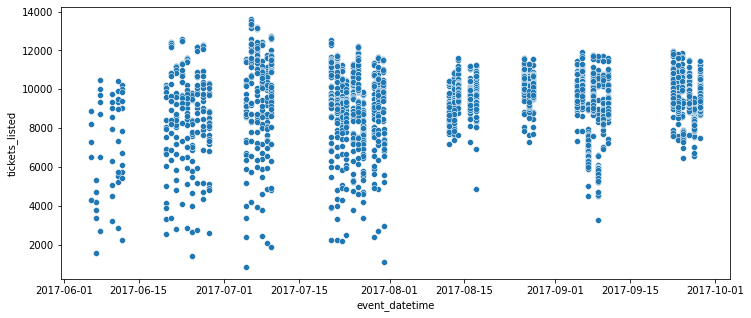

In [404]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_dodger_st, x='event_datetime', y='tickets_listed')

Not an obvious trend but more a tightening of the clusters. This could be from the distance to the event and trying to offload the final batch of tickets a few days before the event.

<Axes: xlabel='listing_date', ylabel='mean_listing_price'>

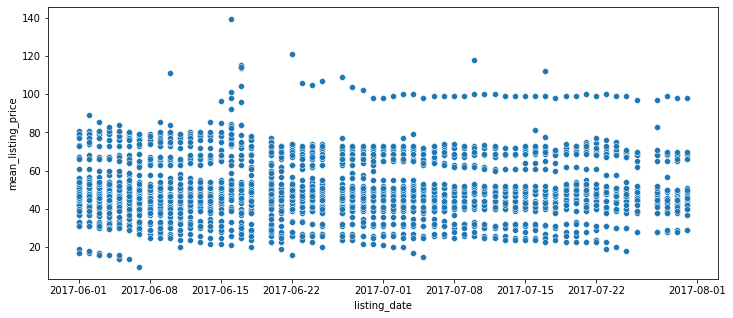

In [405]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_dodger_st, x='listing_date', y='mean_listing_price')

Cheap dodgers tickets!

Worth noting that neither of these scatterplots show any trend or seasonality. This again makes me think the most important feature may be distance to the event not when it is actually listed. 

<Axes: xlabel='event_datetime', ylabel='mean_listing_price'>

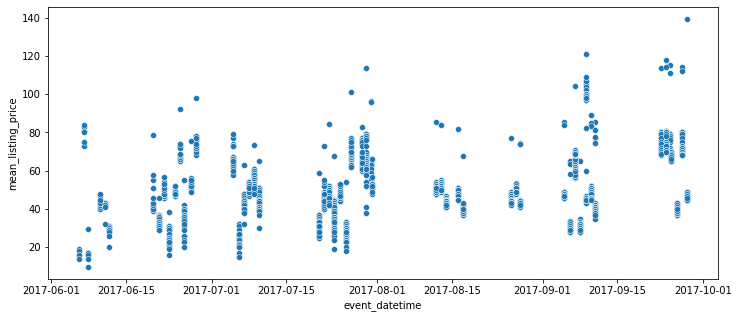

In [406]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_dodger_st, x='event_datetime', y='mean_listing_price')

Clearer trend here. Again it could be due to the venue not posting cheap tickets early. Becaue we are seeing the postings for the tickets for October well in advance, and maybe cheap tickets will be posted later. However, it is also getting towards playoff season so people likely just care more and will pay more.

<Axes: xlabel='days_to_event', ylabel='mean_listing_price'>

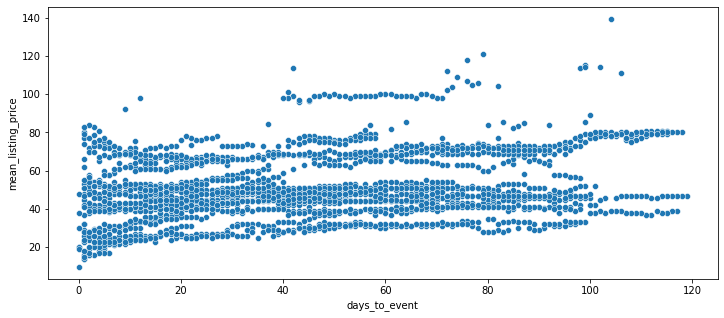

In [407]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_dodger_st, x='days_to_event', y='mean_listing_price')

Maybe a slight trend here. No clear seasonality. The price seems to open up when it gets to a couple of days before the event. Worth investigating by band.

In [408]:
df_W=data.loc[data['venue_name']=='Walt Disney Concert Hall'].copy()
df_W.head()

,event_id,listing_date,event_listing_date_id,taxonomy,event_title,event_datetime,tickets_listed,mean_listing_price,performer_1,performer_2,performer_3,performer_4,venue_name,days_to_event
34,3799895,2017-06-01,3799895_17318,Classical Orchestral,Los Angeles Philharmonic: and Gustavo Dudamel ...,2017-10-08 03:00:00+00:00,68.0,662.5,Los Angeles Philharmonic,NaN,NaN,NaN,Walt Disney Concert Hall,129
35,3799893,2017-06-01,3799893_17318,Classical Orchestral,Los Angeles Philharmonic: Carlos Miguel Prieto...,2017-10-18 03:00:00+00:00,59.0,761.0,Los Angeles Philharmonic,NaN,NaN,NaN,Walt Disney Concert Hall,139
36,3799887,2017-06-01,3799887_17318,Classical Orchestral,Los Angeles Philharmonic: Chamber Music - Los ...,2017-10-25 03:00:00+00:00,59.0,761.0,Los Angeles Philharmonic,NaN,NaN,NaN,Walt Disney Concert Hall,146
37,3799899,2017-06-01,3799899_17318,Classical Orchestral,Los Angeles Philharmonic: Chamber Music by Moz...,2017-10-04 03:00:00+00:00,59.0,761.0,Los Angeles Philharmonic,NaN,NaN,NaN,Walt Disney Concert Hall,125
38,3799867,2017-06-01,3799867_17318,Classical Orchestral,Los Angeles Philharmonic: David Newman - West ...,2017-11-25 04:00:00+00:00,45.0,837.0,Los Angeles Philharmonic,NaN,NaN,NaN,Walt Disney Concert Hall,177


<Axes: xlabel='listing_date', ylabel='tickets_listed'>

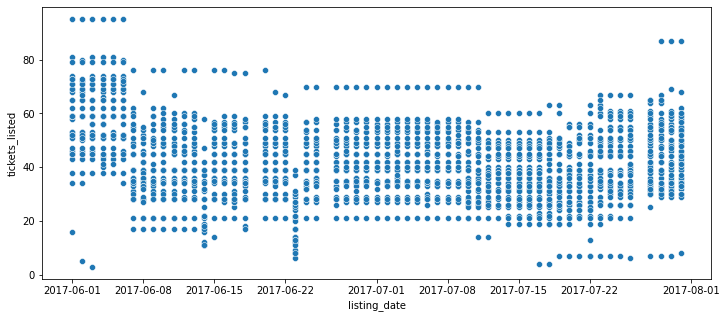

In [409]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_W, x='listing_date', y='tickets_listed')

<Axes: xlabel='listing_date', ylabel='mean_listing_price'>

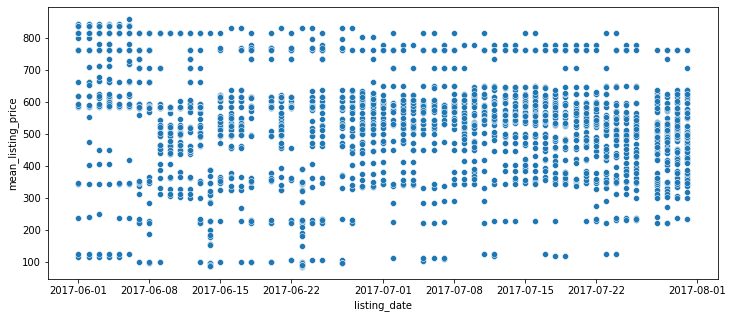

In [410]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_W, x='listing_date', y='mean_listing_price')

<Axes: xlabel='days_to_event', ylabel='mean_listing_price'>

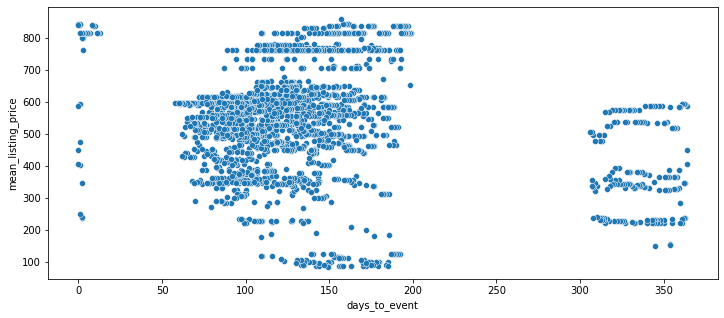

In [411]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_W, x='days_to_event', y='mean_listing_price')

<Axes: xlabel='days_to_event', ylabel='tickets_listed'>

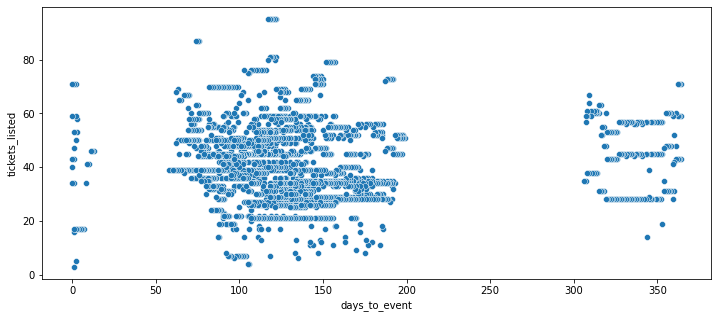

In [412]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_W, x='days_to_event', y='tickets_listed')

<Axes: xlabel='event_datetime', ylabel='mean_listing_price'>

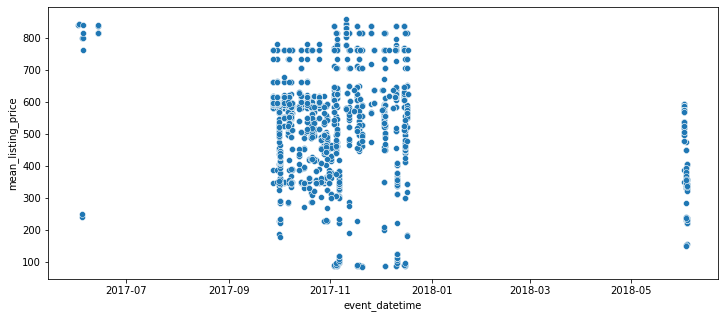

In [413]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_W, x='event_datetime', y='mean_listing_price')

<Axes: xlabel='event_datetime', ylabel='tickets_listed'>

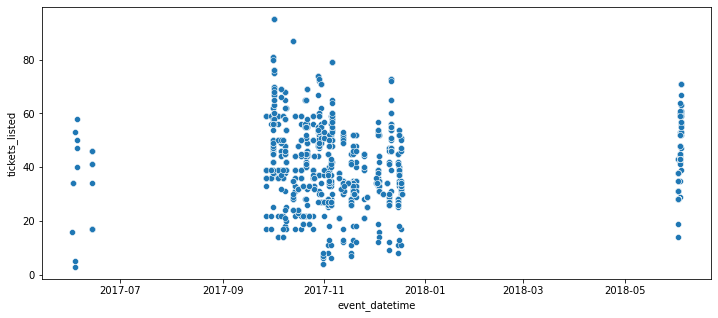

In [414]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_W, x='event_datetime', y='tickets_listed')

For the concert hall, there is no apparent trend or seasonality with regard to any of the time measurements when viewed en masse. There may be trends on the level of individual time series for each event that is hidden at this level.

In [415]:
df_ch = data.loc[data['venue_name']=='Chickasaw Bricktown Ballpark'].copy()
df_ch.head()

,event_id,listing_date,event_listing_date_id,taxonomy,event_title,event_datetime,tickets_listed,mean_listing_price,performer_1,performer_2,performer_3,performer_4,venue_name,days_to_event
22,3601623,2017-06-01,3601623_17318,Minor League Baseball,Colorado Springs Sky Sox at Oklahoma City Dodgers,2017-06-02 02:05:00+00:00,36.0,36.0,Oklahoma City Dodgers,Colorado Springs Sky Sox,NaN,NaN,Chickasaw Bricktown Ballpark,1
23,3580720,2017-06-01,3580720_17318,Minor League Baseball,Colorado Springs Sky Sox at Oklahoma City Dodgers,2017-06-03 02:05:00+00:00,49.0,29.0,Oklahoma City Dodgers,Colorado Springs Sky Sox,NaN,NaN,Chickasaw Bricktown Ballpark,2
24,3580719,2017-06-01,3580719_17318,Minor League Baseball,Colorado Springs Sky Sox at Oklahoma City Dodgers,2017-06-04 02:05:00+00:00,12.0,29.0,Oklahoma City Dodgers,Colorado Springs Sky Sox,NaN,NaN,Chickasaw Bricktown Ballpark,3
25,3750586,2017-06-01,3750586_17318,Minor League Baseball,Colorado Springs Sky Sox at Oklahoma City Dodgers,2017-06-04 21:05:00+00:00,25.0,36.0,Oklahoma City Dodgers,Colorado Springs Sky Sox,NaN,NaN,Chickasaw Bricktown Ballpark,3
26,3580706,2017-06-01,3580706_17318,Minor League Baseball,Iowa Cubs at Oklahoma City Dodgers,2017-07-05 02:05:00+00:00,96.0,44.5,Iowa Cubs,Oklahoma City Dodgers,NaN,NaN,Chickasaw Bricktown Ballpark,34


<Axes: xlabel='listing_date', ylabel='tickets_listed'>

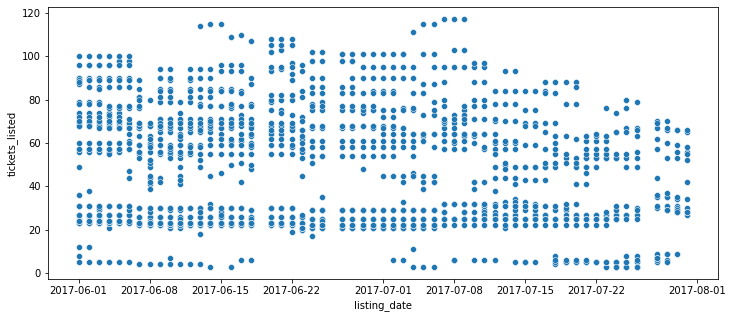

In [416]:
plt.figure(figsize=(12,5))
plt.subplot()
sns.scatterplot(data=df_ch, x='listing_date', y='tickets_listed')


<Axes: xlabel='listing_date', ylabel='mean_listing_price'>

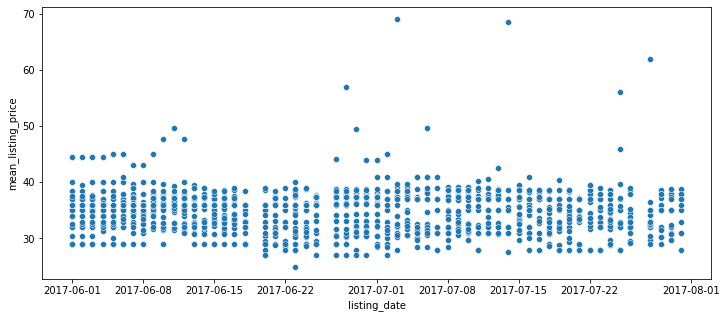

In [417]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_ch, x='listing_date', y='mean_listing_price')

<Axes: xlabel='days_to_event', ylabel='mean_listing_price'>

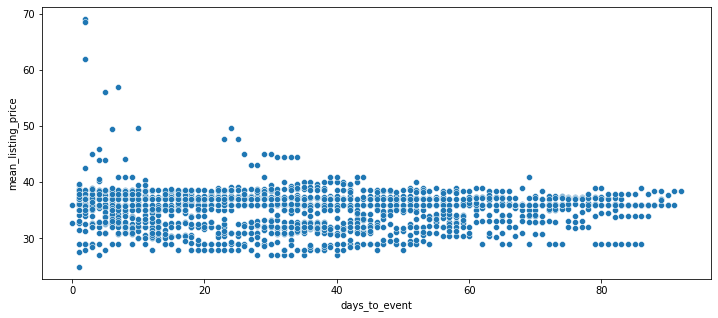

In [418]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_ch, x='days_to_event', y='mean_listing_price')

Investigate the outliers

In [419]:
df_ch.loc[df_ch['mean_listing_price']>50]

,event_id,listing_date,event_listing_date_id,taxonomy,event_title,event_datetime,tickets_listed,mean_listing_price,performer_1,performer_2,performer_3,performer_4,venue_name,days_to_event
3106,3580706,2017-06-28,3580706_17345,Minor League Baseball,Iowa Cubs at Oklahoma City Dodgers,2017-07-05 02:05:00+00:00,98.0,57.00,Iowa Cubs,Oklahoma City Dodgers,NaN,NaN,Chickasaw Bricktown Ballpark,7
3631,3580706,2017-07-03,3580706_17350,Minor League Baseball,Iowa Cubs at Oklahoma City Dodgers,2017-07-05 02:05:00+00:00,33.0,69.00,Iowa Cubs,Oklahoma City Dodgers,NaN,NaN,Chickasaw Bricktown Ballpark,2
4777,3750583,2017-07-14,3750583_17361,Minor League Baseball,New Orleans Baby Cakes at Oklahoma City Dodgers,2017-07-16 02:05:00+00:00,41.0,68.46,New Orleans Baby Cakes,Oklahoma City Dodgers,NaN,NaN,Chickasaw Bricktown Ballpark,2
5865,3750574,2017-07-25,3750574_17372,Minor League Baseball,Tacoma Rainiers at Oklahoma City Dodgers,2017-07-30 02:05:00+00:00,76.0,56.11,Oklahoma City Dodgers,Tacoma Rainiers,NaN,NaN,Chickasaw Bricktown Ballpark,5
6051,3750574,2017-07-28,3750574_17375,Minor League Baseball,Tacoma Rainiers at Oklahoma City Dodgers,2017-07-30 02:05:00+00:00,69.0,61.88,Oklahoma City Dodgers,Tacoma Rainiers,NaN,NaN,Chickasaw Bricktown Ballpark,2


In [420]:
df_ch.loc[df_ch['event_id']==3580706]

,event_id,listing_date,event_listing_date_id,taxonomy,event_title,event_datetime,tickets_listed,mean_listing_price,performer_1,performer_2,performer_3,performer_4,venue_name,days_to_event
26,3580706,2017-06-01,3580706_17318,Minor League Baseball,Iowa Cubs at Oklahoma City Dodgers,2017-07-05 02:05:00+00:00,96.0,44.50,Iowa Cubs,Oklahoma City Dodgers,NaN,NaN,Chickasaw Bricktown Ballpark,34
166,3580706,2017-06-02,3580706_17319,Minor League Baseball,Iowa Cubs at Oklahoma City Dodgers,2017-07-05 02:05:00+00:00,96.0,44.50,Iowa Cubs,Oklahoma City Dodgers,NaN,NaN,Chickasaw Bricktown Ballpark,33
304,3580706,2017-06-03,3580706_17320,Minor League Baseball,Iowa Cubs at Oklahoma City Dodgers,2017-07-05 02:05:00+00:00,96.0,44.50,Iowa Cubs,Oklahoma City Dodgers,NaN,NaN,Chickasaw Bricktown Ballpark,32
440,3580706,2017-06-04,3580706_17321,Minor League Baseball,Iowa Cubs at Oklahoma City Dodgers,2017-07-05 02:05:00+00:00,96.0,44.50,Iowa Cubs,Oklahoma City Dodgers,NaN,NaN,Chickasaw Bricktown Ballpark,31
574,3580706,2017-06-05,3580706_17322,Minor League Baseball,Iowa Cubs at Oklahoma City Dodgers,2017-07-05 02:05:00+00:00,98.0,45.00,Iowa Cubs,Oklahoma City Dodgers,NaN,NaN,Chickasaw Bricktown Ballpark,30
709,3580706,2017-06-06,3580706_17323,Minor League Baseball,Iowa Cubs at Oklahoma City Dodgers,2017-07-05 02:05:00+00:00,98.0,45.00,Iowa Cubs,Oklahoma City Dodgers,NaN,NaN,Chickasaw Bricktown Ballpark,29
839,3580706,2017-06-07,3580706_17324,Minor League Baseball,Iowa Cubs at Oklahoma City Dodgers,2017-07-05 02:05:00+00:00,81.0,43.00,Iowa Cubs,Oklahoma City Dodgers,NaN,NaN,Chickasaw Bricktown Ballpark,28
970,3580706,2017-06-08,3580706_17325,Minor League Baseball,Iowa Cubs at Oklahoma City Dodgers,2017-07-05 02:05:00+00:00,63.0,43.00,Iowa Cubs,Oklahoma City Dodgers,NaN,NaN,Chickasaw Bricktown Ballpark,27
1102,3580706,2017-06-09,3580706_17326,Minor League Baseball,Iowa Cubs at Oklahoma City Dodgers,2017-07-05 02:05:00+00:00,90.0,45.00,Iowa Cubs,Oklahoma City Dodgers,NaN,NaN,Chickasaw Bricktown Ballpark,26
1229,3580706,2017-06-10,3580706_17327,Minor League Baseball,Iowa Cubs at Oklahoma City Dodgers,2017-07-05 02:05:00+00:00,89.0,47.78,Iowa Cubs,Oklahoma City Dodgers,NaN,NaN,Chickasaw Bricktown Ballpark,25


In [421]:
df_ch.loc[df_ch['event_id']==3750583].describe()

,event_id,listing_date,tickets_listed,mean_listing_price,days_to_event
count,43.0,43,43.000000,43.000000,43.000000
mean,3750583.0,2017-06-23 00:33:29.302325504,66.302326,32.017674,22.976744
min,3750583.0,2017-06-01 00:00:00,25.000000,29.000000,1.000000
25%,3750583.0,2017-06-11 12:00:00,61.500000,29.000000,11.500000
50%,3750583.0,2017-06-23 00:00:00,68.000000,30.610000,23.000000
75%,3750583.0,2017-07-04 12:00:00,75.500000,31.220000,34.500000
max,3750583.0,2017-07-15 00:00:00,79.000000,68.460000,45.000000
std,0.0,NaN,11.515073,6.685200,13.420823


In [422]:
df_ch.describe()

,event_id,listing_date,tickets_listed,mean_listing_price,days_to_event
count,2.054000e+03,2054,1783.00000,1783.000000,2054.000000
mean,3.652468e+06,2017-07-02 10:23:15.131450880,44.14470,35.337706,32.194742
min,3.580683e+06,2017-06-01 00:00:00,3.00000,25.000000,0.000000
25%,3.580695e+06,2017-06-13 00:00:00,23.00000,33.000000,13.000000
50%,3.601613e+06,2017-06-30 00:00:00,30.00000,36.000000,28.000000
75%,3.750576e+06,2017-07-18 00:00:00,67.00000,37.260000,47.000000
max,3.757815e+06,2017-08-31 00:00:00,117.00000,69.000000,92.000000
std,8.099355e+04,NaN,26.30558,3.403631,22.636457


While the mean_listing_price column shows that the max values noted earlier are clear outliers, I am not going to remove them. First, it is not clear that they are some mistake in the record, second there is almost certainly a relationship between listing price and tickets listed and removing outliers in listing price would in this case remove non-outliers in the tickets_listed. The outliers will likely effect model performance, but the effect will be with cuase.

<Axes: xlabel='days_to_event', ylabel='tickets_listed'>

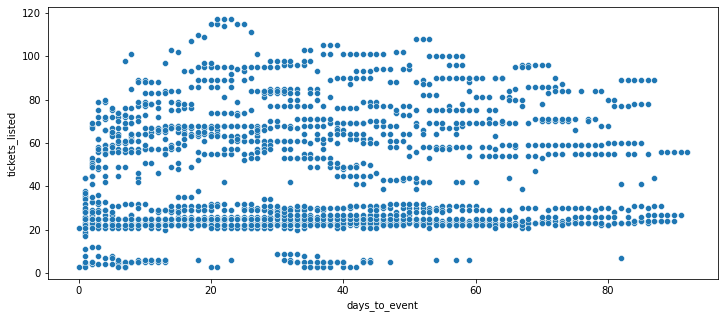

In [423]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_ch, x='days_to_event', y='tickets_listed')

A final bit of exploration to be done is events which we have the full data for. In particular, events which take place before August 1st.

<Axes: xlabel='days_to_event', ylabel='tickets_listed'>

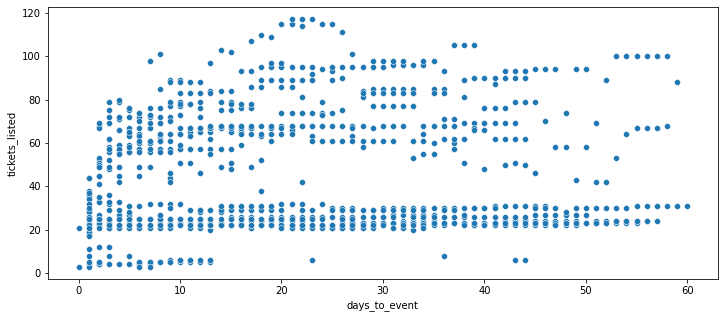

In [511]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_ch.loc[df_ch['event_datetime']<pd.to_datetime('2017-08-01').dayofyear], x='days_to_event', y='tickets_listed')

<Axes: xlabel='days_to_event', ylabel='mean_listing_price'>

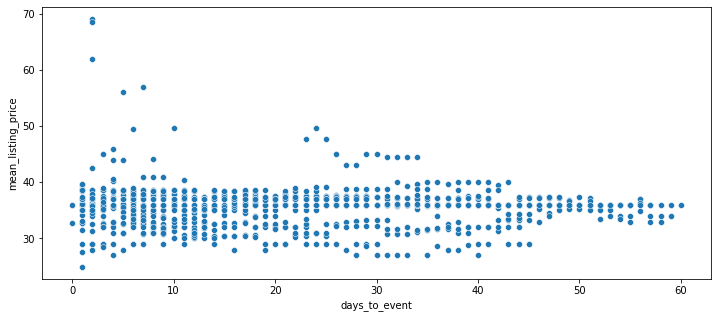

In [512]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_ch.loc[df_ch['event_datetime']<pd.to_datetime('2017-08-01').dayofyear], x='days_to_event', y='mean_listing_price')

The information gained here is a confirmation of the suspicion that data far before the event is somewhat uninteresting. We have this confirmed because all of the strange behavior is still in the data set when we add the cutoff. The same behavior is true for the other data sets but I will omit the graphics.

# Data Preparation

I am going to use boosted trees with LightGBM to model the data. My reason for doing this is that the data is effectively many short time series models. Each event_id corresponds to a different time series. I could make large aggregations so there are three time series, one for each venue; however, this would lead to under fitting. In particular, theres no way this would be able to pick up on the strane behavior that occurs directly before events. Whereas a tree based model will hopefully be able to pick up on the importance of having a decision near the event. In a sense, I want the model to be swayed by the outliers which only appear directly before events.

With LightGBM as the framework of choice, I will encode the date features numerically, adding day of week features to capture the importance of weekend events compared to weekday. The day of week for the listing date is unnecessary to encode. Holidays could be worth encoding in a more robust model.

In [424]:
#more easily digestibale date data for lgb

def date_data_conversion(df):
    df['day_of_event']=df['event_datetime'].dt.dayofweek
    df['month_of_event']=df['event_datetime'].dt.month
    df['listing_date']=df['listing_date'].dt.dayofyear
    df['event_datetime']=df['event_datetime'].dt.dayofyear
    #df['days_to_event']=df['event_datetime']-df['listing_date']
date_data_conversion(data)
date_data_conversion(df_ch)
date_data_conversion(df_dodger_st)
date_data_conversion(df_W)

Now I will get rid of some of the perfectly correlated data. In particular, venue and taxonomy are perfectly corelated. After a minor permutation, performer1 will be perfectly correlated. So I will only preserve venue after this is done. After this, I will one hot encode the venue and performers. One hot encoding the performers will also provide the benefit of dealing with the Nan values in performer 3 and 4 without any extra work.

In [425]:
def swap_columns(df, col1, col2, condition):
       
    mask = condition

    # Swap the values
    df.loc[mask, [col1, col2]] = df.loc[mask, [col2, col1]].values

    return df

df_W['mask']=(df_W['performer_2']=='Los Angeles Philharmonic')

swap_columns(df_W, 'performer_1', 'performer_2', df_W['mask'])

data['mask1']=(data['performer_2']=='Los Angeles Philharmonic')
data['mask2']=(data['performer_2']=='Oklahoma City Dodgers')
data['mask']=data['mask1'] != data['mask2']
swap_columns(data, 'performer_1', 'performer_2', data['mask'])
data.loc[data['mask']==True]

,event_id,listing_date,event_listing_date_id,taxonomy,event_title,event_datetime,tickets_listed,mean_listing_price,performer_1,performer_2,performer_3,performer_4,venue_name,days_to_event,day_of_event,month_of_event,mask1,mask2,mask
26,3580706,152,3580706_17318,Minor League Baseball,Iowa Cubs at Oklahoma City Dodgers,186,96.0,44.5,Oklahoma City Dodgers,Iowa Cubs,NaN,NaN,Chickasaw Bricktown Ballpark,34,2,7,False,True,True
27,3580705,152,3580705_17318,Minor League Baseball,Iowa Cubs at Oklahoma City Dodgers,187,24.0,36.0,Oklahoma City Dodgers,Iowa Cubs,NaN,NaN,Chickasaw Bricktown Ballpark,35,3,7,False,True,True
28,3580704,152,3580704_17318,Minor League Baseball,Iowa Cubs at Oklahoma City Dodgers,188,8.0,34.0,Oklahoma City Dodgers,Iowa Cubs,NaN,NaN,Chickasaw Bricktown Ballpark,36,4,7,False,True,True
44,3209668,152,3209668_17318,Classical Orchestral,Los Angeles Philharmonic: Gustavo Dudamel & Yu...,153,16.0,839.0,Los Angeles Philharmonic,John Pizzarelli,Gustavo Dudamel,Yuja Wang,Walt Disney Concert Hall,1,4,6,True,False,True
45,3555599,152,3555599_17318,Classical Orchestral,Los Angeles Philharmonic: Gustavo Dudamel & Yu...,153,34.0,842.0,Los Angeles Philharmonic,John Pizzarelli,Gustavo Dudamel,Yuja Wang,Walt Disney Concert Hall,1,4,6,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8899,3601613,242,3601613_17408,Minor League Baseball,New Orleans Baby Cakes at Oklahoma City Dodgers,243,NaN,NaN,Oklahoma City Dodgers,New Orleans Baby Cakes,NaN,NaN,Chickasaw Bricktown Ballpark,1,3,8,False,True,True
8900,3601612,242,3601612_17408,Minor League Baseball,New Orleans Baby Cakes at Oklahoma City Dodgers,244,NaN,NaN,Oklahoma City Dodgers,New Orleans Baby Cakes,NaN,NaN,Chickasaw Bricktown Ballpark,2,4,9,False,True,True
8910,3798568,243,3798568_17409,NaN,Cafe Tacuba with Los Angeles Philharmonic and ...,289,NaN,NaN,Los Angeles Philharmonic,Cafe Tacuba,Gustavo Dudamel,NaN,Walt Disney Concert Hall,46,0,10,True,False,True
8971,3798567,243,3798567_17409,NaN,M. Ward with Los Angeles Philharmonic and Rhia...,299,NaN,NaN,Los Angeles Philharmonic,M. Ward,Rhiannon Giddens,NaN,Walt Disney Concert Hall,56,3,10,True,False,True


In [426]:
data['mask']=(data['performer_2']=='Los Angeles Philharmonic')

swap_columns(data, 'performer_1', 'performer_2', data['mask'])

,event_id,listing_date,event_listing_date_id,taxonomy,event_title,event_datetime,tickets_listed,mean_listing_price,performer_1,performer_2,performer_3,performer_4,venue_name,days_to_event,day_of_event,month_of_event,mask1,mask2,mask
0,3594065,152,3594065_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,250,8942.0,56.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium,98,3,9,False,False,False
1,3594068,152,3594068_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,249,11642.0,32.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium,97,2,9,False,False,False
2,3594070,152,3594070_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,248,10344.0,49.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium,96,1,9,False,False,False
3,3594118,152,3594118_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,187,13130.0,32.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium,35,3,7,False,False,False
4,3594116,152,3594116_17318,MLB Baseball,Arizona Diamondbacks at Los Angeles Dodgers,188,13102.0,48.0,Los Angeles Dodgers,Arizona Diamondbacks,NaN,NaN,Dodger Stadium,36,4,7,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8975,3594048,243,3594048_17409,MLB Baseball,San Diego Padres at Los Angeles Dodgers,269,NaN,NaN,Los Angeles Dodgers,San Diego Padres,NaN,NaN,Dodger Stadium,26,1,9,False,False,False
8976,3594045,243,3594045_17409,MLB Baseball,San Diego Padres at Los Angeles Dodgers,271,NaN,NaN,Los Angeles Dodgers,San Diego Padres,NaN,NaN,Dodger Stadium,28,3,9,False,False,False
8977,3594053,243,3594053_17409,MLB Baseball,San Francisco Giants at Los Angeles Dodgers,267,NaN,NaN,Los Angeles Dodgers,San Francisco Giants,NaN,NaN,Dodger Stadium,24,6,9,False,False,False
8978,3594055,243,3594055_17409,MLB Baseball,San Francisco Giants at Los Angeles Dodgers,266,NaN,NaN,Los Angeles Dodgers,San Francisco Giants,NaN,NaN,Dodger Stadium,23,5,9,False,False,False


In [427]:
data.drop(columns=['taxonomy', 'performer_1', 'mask1', 'mask2', 'mask', 'event_listing_date_id', 'event_title'], inplace=True)

Taxonomy and performer1 are dropped because they are one to oen with venue, the masks were temporary fixtures to facilitate swapping, event title is captured by performer and venue, and event listing date id has all unique values, therefore it is effectively an index and therefore unnecessary.

In [428]:
data=pd.get_dummies(data, columns=['performer_2', 'performer_3', 'performer_4', 'venue_name'])


In [433]:
data.columns

Index(['event_id', 'listing_date', 'event_datetime', 'tickets_listed',
       'mean_listing_price', 'days_to_event', 'day_of_event', 'month_of_event',
       'performer_2_American Youth Symphony',
       'performer_2_Arizona Diamondbacks', 'performer_2_Atlanta Braves',
       'performer_2_Cafe Tacuba', 'performer_2_Chicago White Sox',
       'performer_2_Cincinnati Reds', 'performer_2_Colorado Rockies',
       'performer_2_Colorado Springs Sky Sox', 'performer_2_Gil Shaham',
       'performer_2_Gustavo Dudamel', 'performer_2_Hilary Hahn',
       'performer_2_Iowa Cubs', 'performer_2_Israel Philharmonic Orchestra',
       'performer_2_John Pizzarelli', 'performer_2_Kansas City Royals',
       'performer_2_Los Angeles Angels', 'performer_2_M. Ward',
       'performer_2_Marc Lowenstein', 'performer_2_Memphis Redbirds',
       'performer_2_Milwaukee Brewers', 'performer_2_Minnesota Twins',
       'performer_2_Mirga Grazinyte-Tyla', 'performer_2_Nashville Sounds',
       'performer_2_Natali

In [444]:
data = data.applymap(lambda x: int(x) if type(x)==bool else x)

In [445]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8980 entries, 0 to 8979
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   event_id                                   8980 non-null   int64  
 1   listing_date                               8980 non-null   int64  
 2   event_datetime                             8980 non-null   int64  
 3   tickets_listed                             6334 non-null   float64
 4   mean_listing_price                         6334 non-null   float64
 5   days_to_event                              8980 non-null   int64  
 6   day_of_event                               8980 non-null   int64  
 7   month_of_event                             8980 non-null   int64  
 8   performer_2_American Youth Symphony        8980 non-null   int64  
 9   performer_2_Arizona Diamondbacks           8980 non-null   int64  
 10  performer_2_Atlanta Brav

<Axes: xlabel='listing_date', ylabel='days_to_event'>

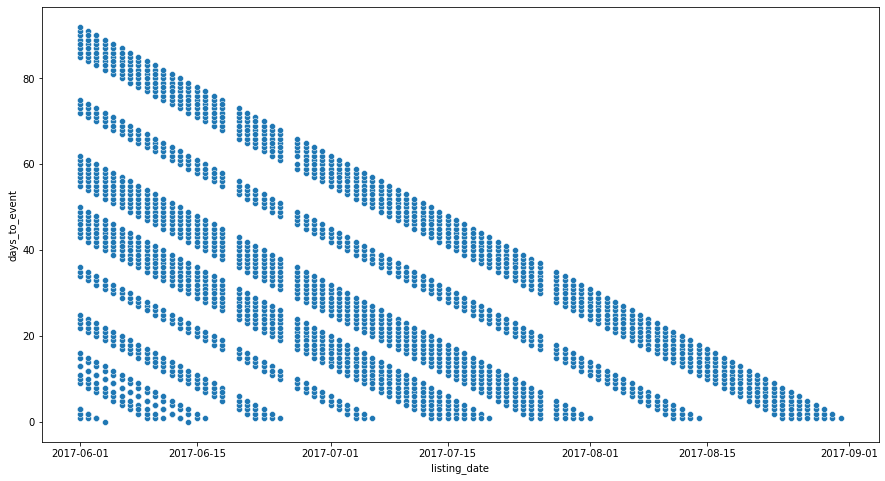

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_ch, x='listing_date', y='days_to_event')

<Axes: xlabel='listing_date', ylabel='days_to_event'>

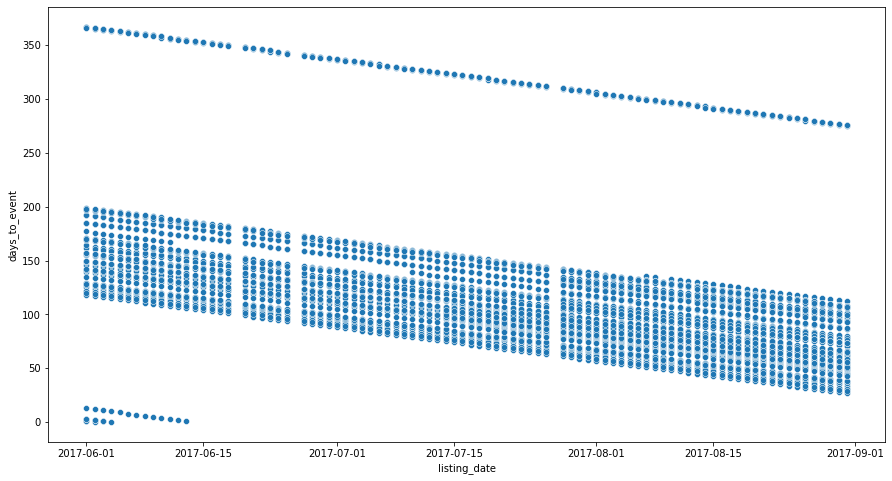

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_W, x='listing_date', y='days_to_event')

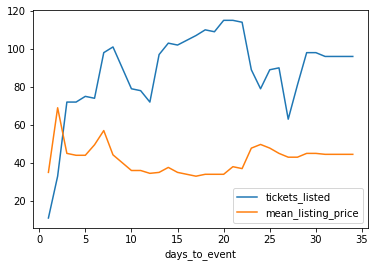

In [ ]:
df_ch.loc[df_ch['event_id']==3580706].plot(x='days_to_event', y=['tickets_listed','mean_listing_price'])
plt.show()

# Model - LightGBM

In [480]:
from sklearn.multioutput import MultiOutputRegressor
import lightgbm as lgb


In [451]:
X_train=data.loc[data['listing_date']<pd.to_datetime('2017-06-30').dayofyear].copy()
y_train=data.loc[(data['listing_date']<pd.to_datetime('2017-06-30').dayofyear)].copy()
X_test1=data.loc[(data['listing_date']<pd.to_datetime('2017-08-01').dayofyear)].copy()
y_test1=data.loc[(data['listing_date']<pd.to_datetime('2017-08-01').dayofyear)].copy()

X_train.drop(columns=['tickets_listed',
       'mean_listing_price'], inplace=True)
X_test1.drop(columns=['tickets_listed',
       'mean_listing_price'], inplace=True)


In [452]:
data.columns

Index(['event_id', 'listing_date', 'event_datetime', 'tickets_listed',
       'mean_listing_price', 'days_to_event', 'day_of_event', 'month_of_event',
       'performer_2_American Youth Symphony',
       'performer_2_Arizona Diamondbacks', 'performer_2_Atlanta Braves',
       'performer_2_Cafe Tacuba', 'performer_2_Chicago White Sox',
       'performer_2_Cincinnati Reds', 'performer_2_Colorado Rockies',
       'performer_2_Colorado Springs Sky Sox', 'performer_2_Gil Shaham',
       'performer_2_Gustavo Dudamel', 'performer_2_Hilary Hahn',
       'performer_2_Iowa Cubs', 'performer_2_Israel Philharmonic Orchestra',
       'performer_2_John Pizzarelli', 'performer_2_Kansas City Royals',
       'performer_2_Los Angeles Angels', 'performer_2_M. Ward',
       'performer_2_Marc Lowenstein', 'performer_2_Memphis Redbirds',
       'performer_2_Milwaukee Brewers', 'performer_2_Minnesota Twins',
       'performer_2_Mirga Grazinyte-Tyla', 'performer_2_Nashville Sounds',
       'performer_2_Natali

In [454]:
X_train.drop(columns=['tickets_listed',
       'mean_listing_price'], inplace=True)
X_test1.drop(columns=['tickets_listed',
       'mean_listing_price'], inplace=True)

y_train.drop(columns=['event_id', 'listing_date', 'event_datetime', 'days_to_event', 'day_of_event', 'month_of_event',
       'performer_2_American Youth Symphony',
       'performer_2_Arizona Diamondbacks', 'performer_2_Atlanta Braves',
       'performer_2_Cafe Tacuba', 'performer_2_Chicago White Sox',
       'performer_2_Cincinnati Reds', 'performer_2_Colorado Rockies',
       'performer_2_Colorado Springs Sky Sox', 'performer_2_Gil Shaham',
       'performer_2_Gustavo Dudamel', 'performer_2_Hilary Hahn',
       'performer_2_Iowa Cubs', 'performer_2_Israel Philharmonic Orchestra',
       'performer_2_John Pizzarelli', 'performer_2_Kansas City Royals',
       'performer_2_Los Angeles Angels', 'performer_2_M. Ward',
       'performer_2_Marc Lowenstein', 'performer_2_Memphis Redbirds',
       'performer_2_Milwaukee Brewers', 'performer_2_Minnesota Twins',
       'performer_2_Mirga Grazinyte-Tyla', 'performer_2_Nashville Sounds',
       'performer_2_Natalia LaFourcade', 'performer_2_New Orleans Baby Cakes',
       'performer_2_New York Mets', 'performer_2_Omaha Storm Chasers',
       'performer_2_Reno Aces', 'performer_2_Riccardo Muti',
       'performer_2_Round Rock Express', 'performer_2_San Diego Padres',
       'performer_2_San Francisco Giants', 'performer_2_Tacoma Rainiers',
       'performer_2_The Phantom of the Opera',
       'performer_2_Washington Nationals',
       'performer_3_Chicago Symphony Orchestra', 'performer_3_Gustavo Dudamel',
       'performer_3_Hilary Hahn', 'performer_3_Los Angeles Angels',
       'performer_3_Rhiannon Giddens',
       "performer_4_Los Angeles Children's Chorus", 'performer_4_Yuja Wang',
       'venue_name_Chickasaw Bricktown Ballpark', 'venue_name_Dodger Stadium',
       'venue_name_Walt Disney Concert Hall'], inplace=True)
y_test1.drop(columns=['event_id', 'listing_date', 'event_datetime', 'days_to_event', 'day_of_event', 'month_of_event',
       'performer_2_American Youth Symphony',
       'performer_2_Arizona Diamondbacks', 'performer_2_Atlanta Braves',
       'performer_2_Cafe Tacuba', 'performer_2_Chicago White Sox',
       'performer_2_Cincinnati Reds', 'performer_2_Colorado Rockies',
       'performer_2_Colorado Springs Sky Sox', 'performer_2_Gil Shaham',
       'performer_2_Gustavo Dudamel', 'performer_2_Hilary Hahn',
       'performer_2_Iowa Cubs', 'performer_2_Israel Philharmonic Orchestra',
       'performer_2_John Pizzarelli', 'performer_2_Kansas City Royals',
       'performer_2_Los Angeles Angels', 'performer_2_M. Ward',
       'performer_2_Marc Lowenstein', 'performer_2_Memphis Redbirds',
       'performer_2_Milwaukee Brewers', 'performer_2_Minnesota Twins',
       'performer_2_Mirga Grazinyte-Tyla', 'performer_2_Nashville Sounds',
       'performer_2_Natalia LaFourcade', 'performer_2_New Orleans Baby Cakes',
       'performer_2_New York Mets', 'performer_2_Omaha Storm Chasers',
       'performer_2_Reno Aces', 'performer_2_Riccardo Muti',
       'performer_2_Round Rock Express', 'performer_2_San Diego Padres',
       'performer_2_San Francisco Giants', 'performer_2_Tacoma Rainiers',
       'performer_2_The Phantom of the Opera',
       'performer_2_Washington Nationals',
       'performer_3_Chicago Symphony Orchestra', 'performer_3_Gustavo Dudamel',
       'performer_3_Hilary Hahn', 'performer_3_Los Angeles Angels',
       'performer_3_Rhiannon Giddens',
       "performer_4_Los Angeles Children's Chorus", 'performer_4_Yuja Wang',
       'venue_name_Chickasaw Bricktown Ballpark', 'venue_name_Dodger Stadium',
       'venue_name_Walt Disney Concert Hall'], inplace=True)

In [455]:
print(X_test1.shape)
print(X_train.shape)
print(y_test1.shape)
print(y_train.shape)

(6334, 51)
(3300, 51)
(6334, 2)
(3300, 2)


In [484]:
lgb_model = lgb.LGBMRegressor(learning_rate=0.05, n_estimators=500)
model = MultiOutputRegressor(lgb_model)
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 3300, number of used features: 30
[LightGBM] [Info] Start training from score 3704.206970
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 3300, number of used features: 30
[LightGBM] [Info] Start training from score 204.779840


MultiOutputRegressor(estimator=LGBMRegressor(learning_rate=0.05,
                                             n_estimators=500))

In [485]:
y_pred1=model.predict(X_test1)

In [470]:
y1=y_test1.to_numpy()


In [471]:
predictions=[]
actual=[]
predictions.extend(y_pred1)
actual.extend(y1)

tl=0
mlp=0
for i in range(len(predictions)):
    tl+=abs(predictions[i][0]-actual[i][0])
    mlp+=abs(predictions[i][1]-actual[i][1])

tl=tl/len(predictions)
mlp=mlp/len(predictions)
print(tl)
print(mlp)

148.45748310484004
23.667777168854748


In [475]:
df_results =data[['days_to_event', 'tickets_listed', 'mean_listing_price','listing_date', 'event_id']].loc[data['listing_date']<pd.to_datetime('2017-08-01').dayofyear]
df_results.drop('listing_date', axis=1, inplace=True)
df_results.loc[df_results['tickets_listed']<100].head(10)

,days_to_event,tickets_listed,mean_listing_price,event_id
22,1,36.0,36.0,3601623
23,2,49.0,29.0,3580720
24,3,12.0,29.0,3580719
25,3,25.0,36.0,3750586
26,34,96.0,44.5,3580706
27,35,24.0,36.0,3580705
28,36,8.0,34.0,3580704
34,129,68.0,662.5,3799895
35,139,59.0,761.0,3799893
36,146,59.0,761.0,3799887


<Axes: xlabel='days_to_event'>

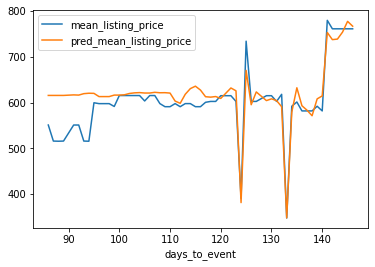

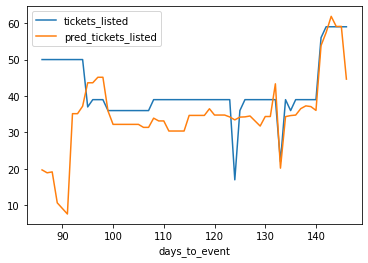

In [479]:


df_results['pred_tickets_listed']=[x[0] for x in predictions]
df_results['pred_mean_listing_price']=[x[1] for x in predictions]

df_results.loc[df_results['event_id']==3799887].plot(x='days_to_event', y=['mean_listing_price','pred_mean_listing_price'])
df_results.loc[df_results['event_id']==3799887].plot(x='days_to_event', y=['tickets_listed','pred_tickets_listed'])


## Extend to unseen data

Now I will train the model on the test data and give a prediction for the unknown values in August.

In [481]:
lgb_model = lgb.LGBMRegressor(learning_rate=0.05, n_estimators=500)
model = MultiOutputRegressor(lgb_model)
model.fit(X_test1, y_test1)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 6334, number of used features: 32
[LightGBM] [Info] Start training from score 3228.568993
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 648
[LightGBM] [Info] Number of data points in the train set: 6334, number of used features: 32
[LightGBM] [Info] Start training from score 229.209391


MultiOutputRegressor(estimator=LGBMRegressor(learning_rate=0.05,
                                             n_estimators=500))

In [483]:
X_future=data.drop(columns=['mean_listing_price', 'tickets_listed'])
y_future=model.predict(X_future)

In [489]:
y_future

array([[ 9282.83771656,    61.15014111],
       [11479.64452719,    38.14695668],
       [11124.21153442,    45.56806307],
       ...,
       [ 8895.18332581,    63.73047499],
       [ 9028.1247573 ,    66.74954032],
       [ 8947.50363993,    63.73047499]])

Adding predicted values to create the submission document.

In [506]:
for idx in range(6334, len(y_future)):
    final.loc[idx,'tickets_listed']=y_future[idx][0]
    final.loc[idx,'mean_listing_price']=y_future[idx][1]

In [509]:
final.to_csv('assessment_data_gallagher.tsv', sep='\t')

# Conclusion

## Outside data

Weather forecasts are an easy piece of data to add some nuance to the number of ticket sales for the baseball games a few days before the event. This might help for some of the odder behavior for ticket prices for an event. In the event of rain, box seats might tick up in price and regular uncovered seats might take a nose dive. I assume weather would not have a noticeable effect on concert tickets.

Another easy to gather data source would be known rivalries or simply rankings for baseball. If the dodgers are facing the Marlins in May, no one is going to care. If they are facing the Padres in September, the ticket prices will probably soar.

A possibly more difficult piece of data is the analogous data for classical music. A conductor who is world famous might drive more interest than the local boys choir. However, this might not pan out because the data did show that some of the highest cost tickets were for the LA philharmonic with no guests. 

This leads to the final easy data source, a set list for the philharmonic. It may be difficult to tie this to a score for what is a better concert, but it would be worth investigating.



## Model Improvements

One way to add in more information to help make predictions near the event date, would be to add a feature which captures the average number of tickets listed with respect to each venue and the number of days before the event, and another feature doing the same for ticket prices. This would help further differentiate the venues and hopefully add some more robustness to the more erratic behavior directly before the event.

More tuning of the model would also be an easy add and likely result in better results.

Seeing at least a full season's worth of data would be helpful for the model. While there was not a very noticeable trend in any of the data with regard to listing date, there was some with respect to the event date and days to event. Therefore, having a full season's worth of event dates would be a boon.

Finally, this model should definitely be compared against another model to see which performs better. An LSTM would definitely be worth looking at for the long range predicting value.